<a href="https://colab.research.google.com/github/dinithprimal/MachineLearning-HandsOn/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the image tensor: (600, 600, 3)


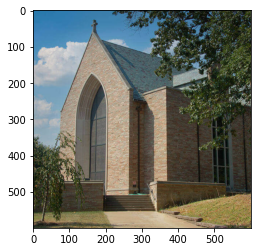

In [ ]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

# Read image
im = imageio.imread("/content/daily-chapel.jpg")
print("Shape of the image tensor: {}".format(im.shape))
plt.imshow(im)

(600, 600)


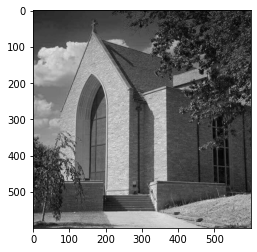

In [ ]:
# Red Channel
im_red = im[:,:,0]
print(im_red.shape)
plt.imshow(im_red, cmap='gray')

(600, 600)


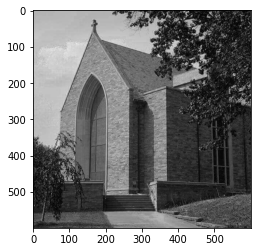

In [ ]:
# Red Channel
im_red = im[:,:,2]
print(im_red.shape)
plt.imshow(im_red, cmap='gray')

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F

In [ ]:
# Create a random flat input vector
x_fc = torch.randn(100, 784)

# Create weight matrix variable
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Create bias variable
b = torch.zeros(10, requires_grad=True)

# Apply fully connected layer
y_preact = torch.matmul(x_fc, W) + b
y = F.relu(y_preact)

# Print input/output shapes
print("Input shape: {}".format(x_fc.shape))
print("Output shape: {}".format(y.shape))

Input shape: torch.Size([100, 784])
Output shape: torch.Size([100, 10])


In [ ]:
# Create a random image input tensor
x_cnn = torch.randn(100, 1, 28, 28)

# Create cinvolutional kernal variable
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()

# Create bias variable
b1 = torch.zeros(16, requires_grad=True)

# Applying convolutional layer
conv1_preact = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_preact)

# Print input/output shapes
print("Input shape: {}".format(x_cnn.shape))
print("Convolution output shape: {}".format(conv1.shape))

Input shape: torch.Size([100, 1, 28, 28])
Convolution output shape: torch.Size([100, 16, 28, 28])


In [ ]:
# 2n layer variables
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()
b2 = torch.zeros(32, requires_grad=True)

# Apply 2nd layer convolutional layer
conv2 = F.relu(F.conv2d(conv1, W2, bias=b2, stride=1, padding=1))

# Print output shapes
print("Second convolution output shape: {}".format(conv2.shape))

Second convolution output shape: torch.Size([100, 32, 28, 28])


In [ ]:
M = torch.zeros(4, 3)

M2 = M.view(1, 1, 12)
M3 = M.view(2, 1, 2, 3)
M4 = M.view(-1, 2, 3)
M5 = M.view(-1)

In [ ]:
# Reshape flat input image into 4D batch image input
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

# print input shape
print(x_reshaped.shape)

torch.Size([100, 1, 28, 28])


In [ ]:
# Flatten convolutional feature maps into a vector
h_flat = conv2.view(-1, 28*28*32)

# Print output shape
print(h_flat.shape)

torch.Size([100, 25088])


In [ ]:
# Taking the output we've been working with so far, first print its current size
print("Shape of conv2 feature maps before pooling: {0}".format(conv2.shape))

# Max pool and then print new shape
max_pool2 = F.max_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after max pooling: {0}".format(max_pool2.shape))

# Average pool and then print new shape
avg_pool2 = F.avg_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after avg pooling: {0}".format(avg_pool2.shape))

Shape of conv2 feature maps before pooling: torch.Size([100, 32, 28, 28])
Shape of conv2 feature maps after max pooling: torch.Size([100, 32, 14, 14])
Shape of conv2 feature maps after avg pooling: torch.Size([100, 32, 14, 14])


In [ ]:
# Recreate values in pooling figure and make it 4D
feature_map_fig = torch.tensor(np.array([[1,1,2,4],
                                         [5,6,7,8],
                                         [3,2,1,0],
                                         [1,2,3,4]], dtype=np.float32))
fmap_fig = feature_map_fig.view(1,1,4,4)
print("Feature map shape pre-pooling: {}".format(fmap_fig.shape))

# Maxpool
max_pool_fig = F.max_pool2d(fmap_fig, kernel_size=2)
print("\nMax pool")
print("Shape: {}".format(max_pool_fig.shape))
print(torch.squeeze(max_pool_fig))

# Avgpool
avg_pool_fig = F.avg_pool2d(fmap_fig, kernel_size=2)
print("\nAVG pool")
print("Shape: {}".format(avg_pool_fig.shape))
print(torch.squeeze(avg_pool_fig))

Feature map shape pre-pooling: torch.Size([1, 1, 4, 4])

Max pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[6., 8.],
        [3., 4.]])

AVG pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[3.2500, 5.2500],
        [2.0000, 2.0000]])


In [ ]:
# Since striding is part of the convolutin operation, we'll start wiht the feature maps before the 2nd convolution
print("Shape of conv1 feature maps: {0}".format(conv1.shape))

# Apply 2nd convoutional layer, with striding of 2
conv2_stride = F.relu(F.conv2d(conv1, W2, bias=b2, stride=2, padding=1))

# Print output shape
print("Shape of conv2 feature maps with stride of 2: {0}".format(conv2_stride.shape))

Shape of conv1 feature maps: torch.Size([100, 16, 28, 28])
Shape of conv2 feature maps with stride of 2: torch.Size([100, 32, 14, 14])


In [ ]:
import torch.nn as nn

class MNIST_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
    self.fc1 = nn.Linear(7*7*64, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self, x):
    # conv layer 1
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)

    # conv layer 2
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)

    # fc layer 1
    x = x.view(-1, 7*7*64)
    x = self.fc1(x)
    x = F.relu(x)

    # fc layer 2
    x = self.fc2(x)
    return x


In [ ]:
model = MNIST_CNN()
print(model)

MNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model  
model = MNIST_CNN()  # <---- change here

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # <---- change here

# Iterate through train set minibatchs 
for epoch in trange(3):  # <---- change here
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images  # <---- change here 
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  # <---- change here 
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9891999959945679
